Import all necessary modules in the code cell below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

Read in the "cust_seg.csv" file using Pandas' read_csv() function. 

Then drop the first column of the data (the one without a column-name). 

Use Pandas' head() function to view the first few records.

In [2]:
df = pd.read_csv('cust_seg.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)

df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


Use describe() on your Pandas' dataframe to display a statistical summary of the dataset.

In [3]:
df.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


Display 4 histograms to show the distributions for (a) Age, (b) Income, (c) Years Employed and (d) DebtIncomeRatio.

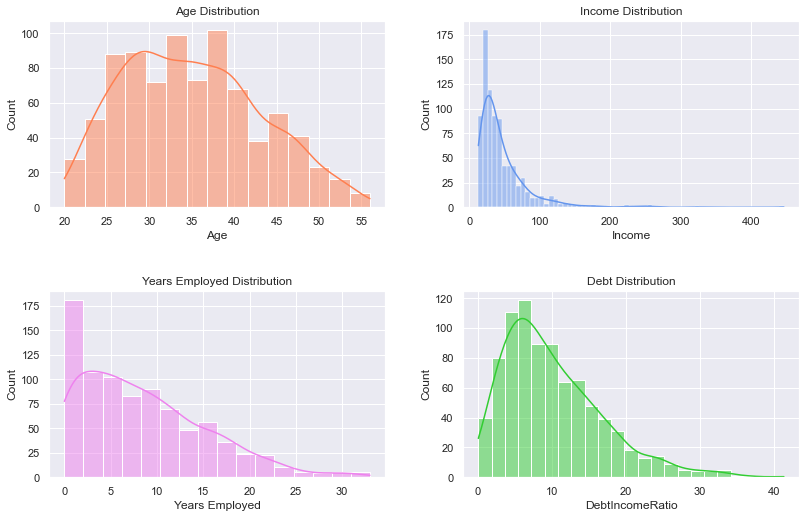

In [4]:
sb.set(style='darkgrid')
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

# age distribution
sb.histplot(
    data=df['Age'], 
    color='coral', 
    kde='True',
    ax=ax[0,0]
)

# income distribution
sb.histplot(
    data=df['Income'], 
    color='cornflowerblue', 
    kde='True',
    ax=ax[0,1]
)

# years employed distribution
sb.histplot(
    data=df['Years Employed'], 
    color='violet', 
    kde='True',
    ax=ax[1,0]
)

# debt income ratio distribution
sb.histplot(
    data=df['DebtIncomeRatio'], 
    color='limegreen', 
    kde='True',
    ax=ax[1,1]
)

ax[0,0].set_title('Age Distribution')         
ax[0,1].set_title('Income Distribution')          
ax[1,0].set_title('Years Employed Distribution')
ax[1,1].set_title('Debt Distribution')

fig.tight_layout(pad=3.0)   # padding between plots
plt.show()

Display the count (using seaborn's countplot()) to show the count difference between defaults and non-defaults. 

Print out the number of Default and Non-Default cases.

Print out the percentage of Default cases.

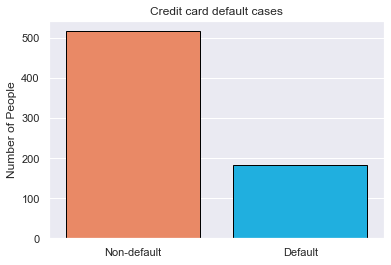

Number of Default cases are 183
Number of Non-Default cases are 517
Percentage of Default cases is 26.1%


In [5]:
df_default = df[df['Defaulted'] == 1.0]
df_nondefault = df[df['Defaulted'] == 0.0]

num_default = len(df_default)
num_nondefault = len(df_nondefault)

fig, ax = plt.subplots()
sb.countplot(x=df['Defaulted'], 
             palette = ['coral', 'deepskyblue'], 
             edgecolor = 'black')
plt.title('Credit card default cases')
ax.set_xticklabels(['Non-default', 'Default'])
plt.xlabel('')
plt.ylabel('Number of People')
plt.show()

print('Number of Default cases are', num_default)
print('Number of Non-Default cases are', num_nondefault)
print('Percentage of Default cases is {:.1%}'.format(num_default/(num_default+num_nondefault)))

Using Seaborn's scatterplot() function, plot "Years Employed" (x-axis) vs "Income" (y-axis). 

Set the "hue" parameter of scatterplot() to match the "Defaulted" column of the data so that we can tell whether a data point on the plot is a Defaulted or Non-Defaulted case. 

Set the "size" parameter of scatterplot() to match the "DebtIncomeRatio" so that a record with high Debt Income Ratio will be rendered bigger than one with a smaller Debt Income Ratio.

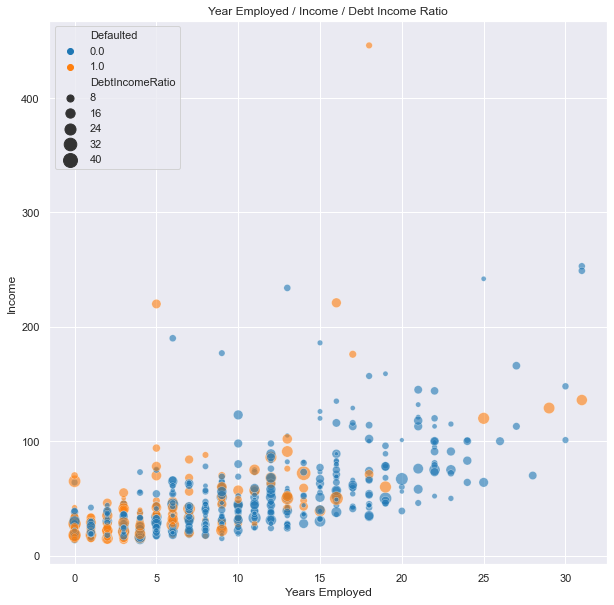

In [6]:
fig = plt.subplots(figsize=(10,10))
sb.scatterplot(x='Years Employed', y='Income', 
               data = df, 
               size = 'DebtIncomeRatio', 
               sizes = (15, 200),   # normalized all points between a size of 15 and 200
               alpha = 0.6, 
               hue = 'Defaulted',   # different color for default/non-default
               palette='tab10')
plt.title('Year Employed / Income / Debt Income Ratio')
plt.xlabel('Years Employed')
plt.ylabel('Income')
plt.legend(loc = 'upper left')

plt.show()

Use Pandas' drop() to remove the "Customer Id" column from our dataframe. 

Use head() to verify that the column has been removed. 

In [7]:
df.drop(['Customer Id'], axis=1, inplace=True)
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


Split our dataset into two smaller sets - one with valid values (e.g. 0.0 or 1.0) in the Defaulted column and the other where the Defaulted value is empty/null.


In [8]:
df_isnull = df[df.Defaulted.isnull()]
df_notna = df[df.Defaulted.notnull()]


Create and Train a KNN model to predict if a given record has a default or non-default status. Use only those records with valid values in the Defaulted column.

The X_train data would consist of all rows with a Defaulted value. All columns are used for training, except the 'Defaulted' column.

The y_train data would consist of all rows with a value in the Defaulted column.

In [9]:
X_train = df_notna.drop(['Defaulted'], axis=1).values
y_train = df_notna['Defaulted'].values

knn = KNeighborsClassifier(n_neighbors = 7) 
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

Feed records with missing Default value (e.g. no value in the Defaulted column) into our KNN model to predict whether they would have a Default (1.0) or Non-Default value (0.0). Use KNN's predict() function to do so.

Print out the predicted Defaulted values.

In [10]:
X_test = df_isnull.drop(['Defaulted'], axis=1).values
default_predicts = knn.predict(X_test)

print(default_predicts)

[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0.]


Update our dataframe using the predicted Defaulted values, such that all records that initally have missing Defaulted values are now replaced with their respective predicted Defaulted value (either 0.0 or 1.0).

In [11]:
for i in range(len(default_predicts)):
    df.loc[df_isnull.index[i], 'Defaulted'] = default_predicts[i]

df.describe()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.238824,10.171647
std,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.426616,6.719441
min,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,0.000000,13.800000
max,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


Compute and plot the WCSS for 1 to 10 clusters. From the generated WCSS graph, deduce the optimal number of clusters for our dataset using the elbow method.

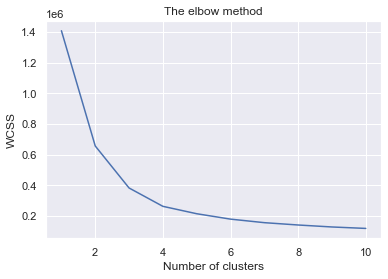

In [12]:
data = df.values    # convert dataframe to numpy array

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X=data)
    wcss.append(kmeans.inertia_)

# plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # within cluster sum of squares
plt.show()

Perform KMeans clustering on the dataset using the number of clusters deduced from the WCSS plot.

Print out the cluster-allocation for each record in our dataset.

In [13]:
n_clusters = 4
model = KMeans(init='k-means++', n_clusters=n_clusters)

clusters = model.fit_predict(X=data)
clusters


array([0, 1, 3, 0, 2, 3, 3, 3, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 3, 1, 3, 0, 0, 3, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 3, 0, 3, 0, 3, 3, 0, 0,
       3, 0, 0, 0, 3, 3, 1, 0, 0, 0, 3, 0, 1, 3, 3, 3, 1, 0, 3, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 3, 3, 0, 3, 0, 0, 3, 3,
       3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 1, 1, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0,
       3, 0, 0, 3, 3, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3,
       2, 0, 1, 0, 0, 0, 0, 3, 0, 2, 1, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 3,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 1, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3,
       3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0, 1, 0,
       3, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,

Display Scatter plots to display the clustering of results of our dataset. Each data point displayed in the plots should have an unique color that represents the cluster that it is being assigned to.

(a) Create a Scatter plot for Age (x-axis) vs Income (y-axis)

(b) Create a Scatter plot for DebtIncomeRation (x-axis) vs Income (y-axis)

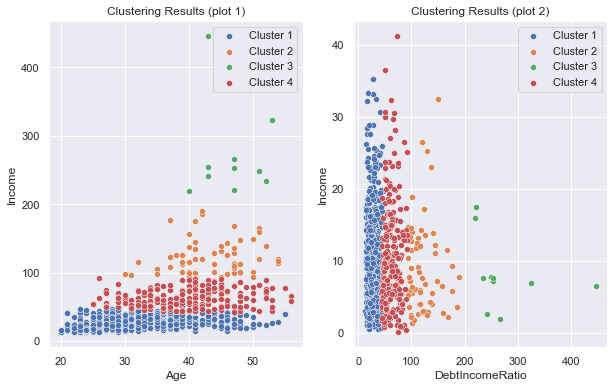

In [14]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 6))

for i in np.unique(clusters):
    sb.scatterplot(x=data[clusters==i,0], y=data[clusters==i,3], 
		label='Cluster ' + str(i+1), ax=ax[0])
    sb.scatterplot(x=data[clusters==i,3], y=data[clusters==i,-1], 
		label='Cluster ' + str(i+1), ax=ax[1])

ax[0].set_xlabel('Age')                
ax[0].set_ylabel('Income') 
ax[0].set_title('Clustering Results (plot 1)')               

ax[1].set_xlabel('DebtIncomeRatio')
ax[1].set_ylabel('Income')
ax[1].set_title('Clustering Results (plot 2)')               

plt.show()                

Create a 3D plot with values from Age (x-axis), Income (y-axis) and DebtIncomeRatio (z-axis) columns. 

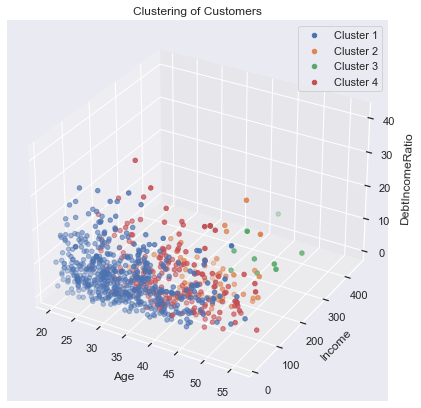

In [15]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

for i in np.unique(clusters):
	ax.scatter(xs=data[clusters==i,0], 
		ys=data[clusters==i,3],
    	zs=data[clusters==i,-1],
		label='Cluster ' + str(i+1))
		
ax.set_xlabel('Age')		
ax.set_ylabel('Income')		
ax.set_zlabel('DebtIncomeRatio')

ax.set_title('Clustering of Customers')
plt.legend()
plt.show()		